In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 한글 호환 문제
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rcParams['font.family'] = 'NanumBarunGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/뽀로로드/data(아파트시세_가공)/final.csv', encoding='cp949')
df

,Unnamed: 0,자치구명,층,계약일,임대면적,건물명,건물용도,연식,전세가,평당전세가,...,마트,버스정류장,어린이집,CCTV,스타벅스,대학교,병원,지하철,초중고,한강
0,0,용산구,6.0,20200810.0,22.03,\t(1)\t,오피스텔,30.0,5000.000000,748.978665,...,NaN,7.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
1,1,용산구,3.0,20200921.0,66.15,(65-17),연립다세대,12.0,28000.000000,1396.825397,...,NaN,7.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
2,2,용산구,5.0,20200225.0,29.72,7-12,연립다세대,1.0,27000.000000,2997.981157,...,NaN,7.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
3,3,용산구,4.0,20200210.0,29.94,7-12,연립다세대,1.0,27500.000000,3031.062124,...,NaN,7.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
4,4,용산구,5.0,20200111.0,29.69,yonginvill(7-5),연립다세대,2.0,17115.465360,1902.358898,...,NaN,7.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594373,1594373,강북구,15.0,20221229.0,29.22,수유역투웨니퍼스트,오피스텔,0.0,39396.121884,4449.254012,...,2.0,99.0,22.0,29.0,1.0,NaN,NaN,NaN,5.0,NaN
1594374,1594374,강북구,8.0,20221230.0,127.25,해모로아파트,아파트,19.0,55000.000000,1426.326130,...,2.0,99.0,22.0,29.0,1.0,NaN,NaN,NaN,5.0,NaN
1594375,1594375,강북구,10.0,20221231.0,41.30,주공1단지,아파트,31.0,17000.000000,1358.353511,...,2.0,99.0,22.0,29.0,1.0,NaN,NaN,NaN,5.0,NaN
1594376,1594376,강북구,16.0,20221231.0,117.28,오동공원현대,아파트,21.0,45000.000000,1266.200546,...,2.0,99.0,22.0,29.0,1.0,NaN,NaN,NaN,5.0,NaN


In [ ]:
df1 = df[['자치구명','전세가']]
df1

,자치구명,전세가
0,용산구,5000.000000
1,용산구,28000.000000
2,용산구,27000.000000
3,용산구,27500.000000
4,용산구,17115.465360
...,...,...
1594373,강북구,39396.121884
1594374,강북구,55000.000000
1594375,강북구,17000.000000
1594376,강북구,45000.000000


In [ ]:
df2 = df1.groupby('자치구명').mean()
df2

,전세가
자치구명,
강남구,56455.896767
강동구,27332.366034
강북구,17372.210915
강서구,23177.565447
관악구,17890.289061
광진구,23854.392591
구로구,21757.742570
금천구,18252.203429
노원구,23359.155790


Text(0.5, 1.0, '서울특별시 구별 전세가')

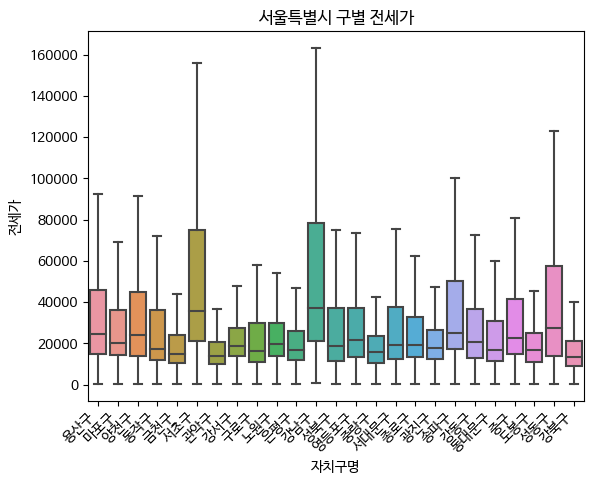

In [ ]:
# seaborn에서 동그라미는 이상치를 나타낸다. showfliers=False 를 통해서 제거 가능
sns.boxplot(data=df1, x='자치구명',y='전세가', showfliers=False)
plt.xticks(rotation=45, ha='right')
plt.title('서울특별시 구별 전세가')